In [1]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 指定gpu设备
import os
os.environ['CUDA_VISIBLE_DEVICES'] ="0" # gpu
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # cpu

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

'4.5.1'

(512, 512, 3)

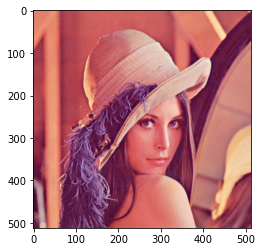

In [2]:
# 读取图片，并且做颜色转换
cv2.__version__
img = cv2.imread('lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape
plt.imshow(img)

(512, 512)

262144

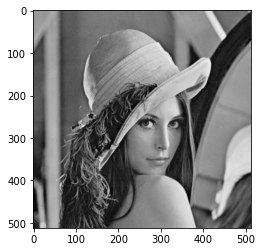

In [3]:
# 转成灰度图
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_img.shape
gray_img.size
plt.imshow(gray_img, cmap='gray')

In [4]:
def plt_plot(img, hist):
    plt.figure(figsize=(15,5))
    plt.subplot(121), plt.imshow(img, cmap='gray', vmin=0, vmax=255), plt.title("Original"), plt.axis('off')
    plt.subplot(122, xticks=[], yticks=[]), plt.axis([0,255,0,np.max(hist)])
    plt.bar(range(256), hist), plt.title("Gray Hist")

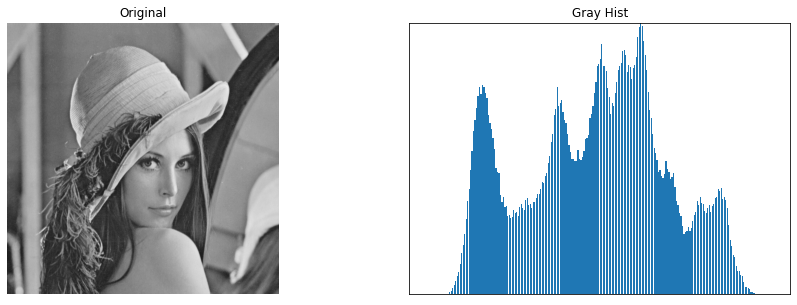

In [5]:
# 求直方图
# 总共256个色阶，遍历获得每个色阶包含的像素个数
def get_hist(img):
    hist = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i][j]] += 1
    return hist
hist = get_hist(gray_img)
# 绘制直方图
plt_plot(gray_img, hist)

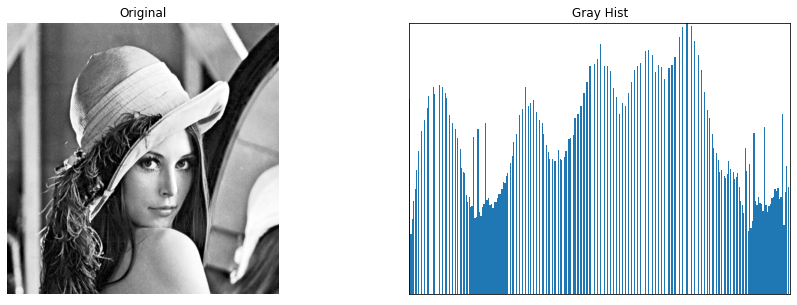

In [6]:
# 直方图均衡化
# 求映射关系
pixs_ratio = hist / float(gray_img.size)
ratios = np.zeros(256)
ratios[0] = pixs_ratio[0]
for i in range(1, 256, 1):
    ratios[i] =  ratios[i-1] + pixs_ratio[i]
# ratios

# 修改像素值
fix_img = np.zeros(gray_img.shape, dtype=np.uint8)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        fix_img[i][j] = int(ratios[gray_img[i][j]] * 256 - 1)
# fix_img

fix_hist = get_hist(fix_img)
# fix_hist
plt_plot(fix_img, fix_hist)

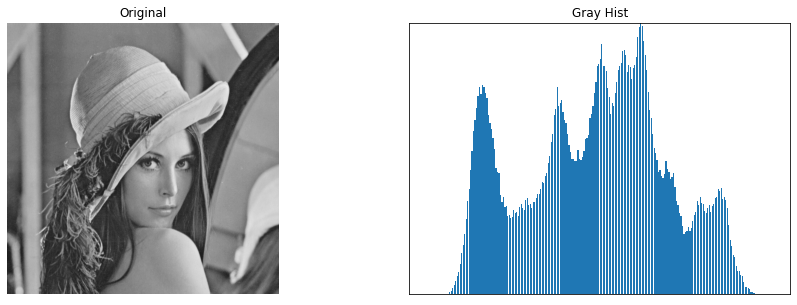

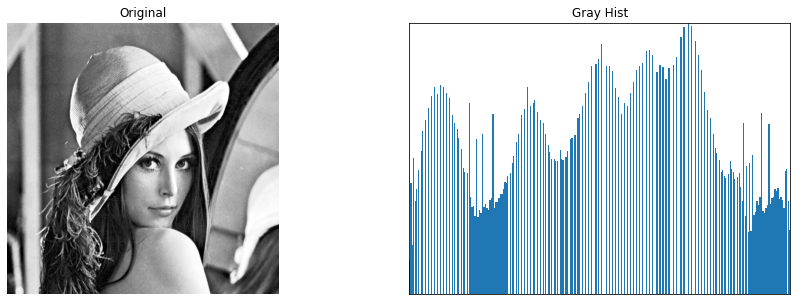

In [7]:
# opencv的求直方图与直方图均衡化方法
# cv_img = cv2.imread('lenna.png', flags=0)
# plt.imshow(cv_img, cmap='gray')
# cv_hist = cv2.calcHist([cv_img], [0], None, [256], [0, 256])
cv_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt_plot(gray_img, cv_hist.reshape(256))

# 和我自己处理的不太一样
cv_dst = cv2.equalizeHist(gray_img)
cv_dst_hist = cv2.calcHist([cv_dst], [0], None, [256], [0, 256])
plt_plot(cv_dst, cv_dst_hist.reshape(256))

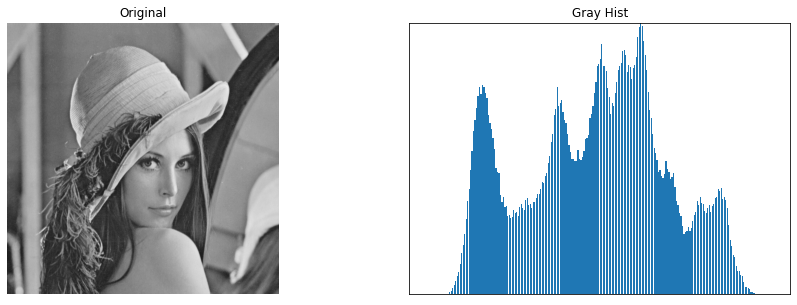

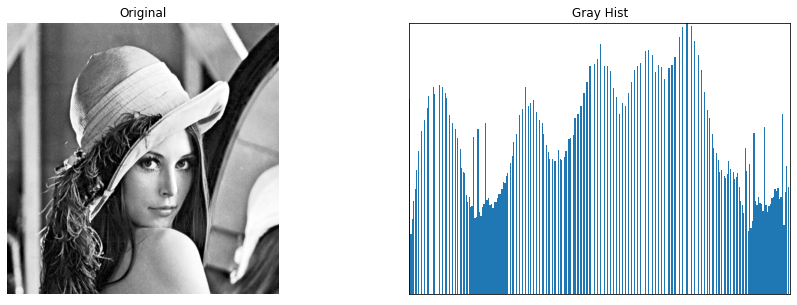

In [8]:
# 直接使用 numpy的方法做均衡化
# 计算直方图
hist, bins = np.histogram(gray_img.flatten(), 256, [0, 256])
plt_plot(gray_img, hist)

# hist

# 均衡化
hist = hist / gray_img.size # 单个像素的概率
prop = np.cumsum(hist) # 计算累积概率
img_map = np.array([int(256 * prop[i] - 1) for i in range(256)]) # 像素值映射
# gray_img
np_img = img_map[gray_img]
hist, bins = np.histogram(np_img.flatten(), 256, [0, 256])
plt_plot(np_img, hist)